# Worked Example
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. In this dataset, the target variable is labeled "Outcome," and it serves as an indicator of whether an individual has diabetes or not. This variable is binary in nature, with the following encoding:

0 corresponds to "Absence of diabetes"
1 corresponds to "Presence of diabetes"

We will implement Feature Selection & Dimensionality Reduction on the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
df1 = pd.read_csv("diabetes.csv")
##Reading the dataset
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##Checking for Null values

In [5]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [37]:
print(X.shape)
X.head()

(768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [38]:
print(Y.shape)
Y.head()

(768,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

##Checking for Multicollinearity



In [39]:
correlation=X.corr()
eigenvalues, eigenvectors = np.linalg.eig(correlation)

In [40]:
small_eigenvalues = eigenvalues[eigenvalues < 1]

if len(small_eigenvalues) > 0:
    print("There are small eigenvalues in the correlation matrix, thus varialbles are not highly correlated")
else:
    print("There are no small eigenvalues in the correlation matrix.")

There are small eigenvalues in the correlation matrix, thus varialbles are not highly correlated


In [41]:
X_scaled=StandardScaler().fit_transform(X)

## Deciding n_components for PCA

In [42]:
sortedValues = np.argsort(eigenvalues, axis=0)[::-1]
sortedVectors = eigenvectors[:, sortedValues]

<ipython-input-43-9dcd7d8b4dc9>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 10, 1)


(1.0, 10.0)

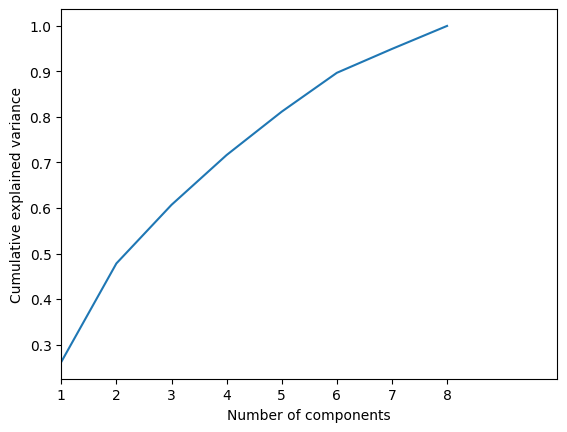

In [43]:
cumulative_sum = np.cumsum(eigenvalues[sortedValues]) / np.sum(eigenvalues[sortedValues])
xint = range(1, len(cumulative_sum) + 1)
plt.plot(xint, cumulative_sum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 10, 1)

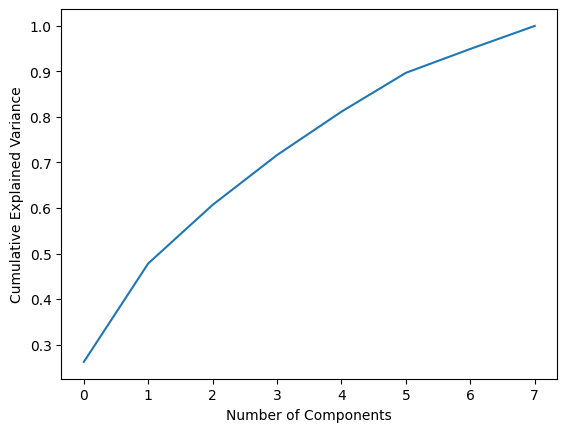

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
## using X_scaled
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [47]:
pca = PCA(0.95)                                                                 # Retain enough components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [48]:
X_pca.shape

(768, 8)

In this case PCA did not help as all the componants contribute significantly towards the target variable.

##Implementing Logistic Regression on PCA transformed data

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Train logistic regression model on transformed data
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Predict on test set and evaluate performance
Y_pred = lr.predict(X_test)

In [51]:
# Evaluate the model on the training data
train_accuracy = lr.score(X_train, Y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing data
test_accuracy = lr.score(X_test, Y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.7703583061889251
Testing accuracy: 0.7532467532467533


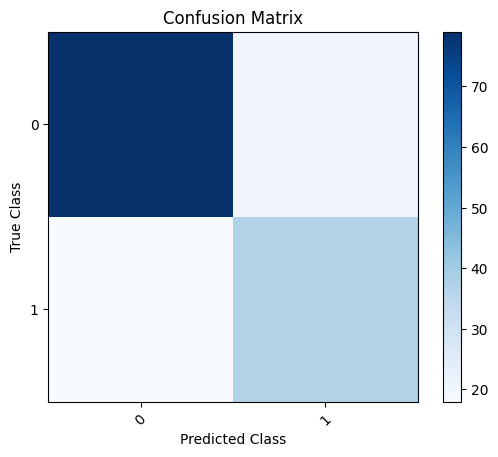

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [53]:
from sklearn.metrics import confusion_matrix, classification_report
labels = np.unique(Y)
cm = confusion_matrix(Y_test, Y_pred, labels=labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print classification report
report = classification_report(Y_test, Y_pred, labels=labels)
print(report)

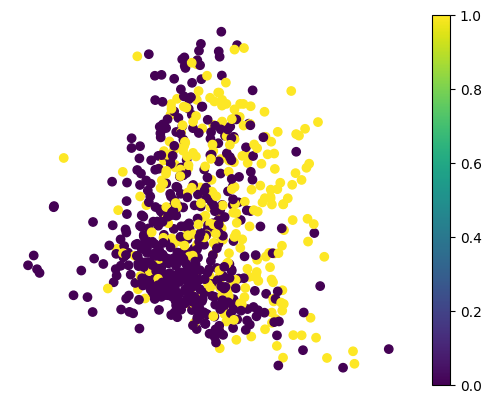

In [55]:
from sklearn.decomposition import PCA
PCA_train_x = PCA(2).fit_transform(X_scaled)

plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1],c=Y)
plt.axis('off')
plt.colorbar()
plt.show()

##LDA (Linear Discriminant Analysis)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()                                                            # Standardizing the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Implementing LDA

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [59]:
# Transforming data using LDA
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, Y_train)
Y_pred = clf.predict(X_test_lda)

In [62]:
# Evaluate the model on the training data
train_accuracy = clf.score(X_train_lda, Y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing data
test_accuracy = clf.score(X_test_lda, Y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.7687296416938111
Testing accuracy: 0.7597402597402597


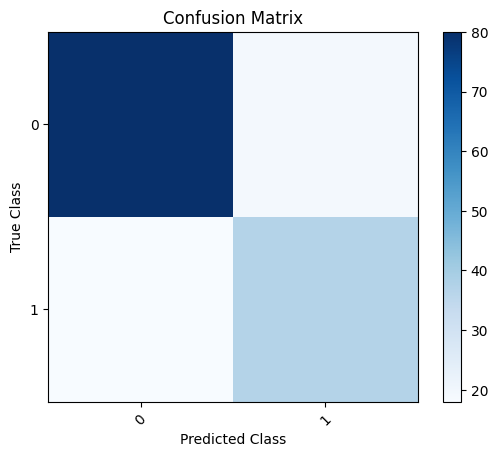

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [64]:
from sklearn.metrics import confusion_matrix, classification_report
labels = np.unique(Y)
cm = confusion_matrix(Y_test, Y_pred, labels=labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print classification report
report = classification_report(Y_test, Y_pred, labels=labels)
print(report)

#Feature Selection

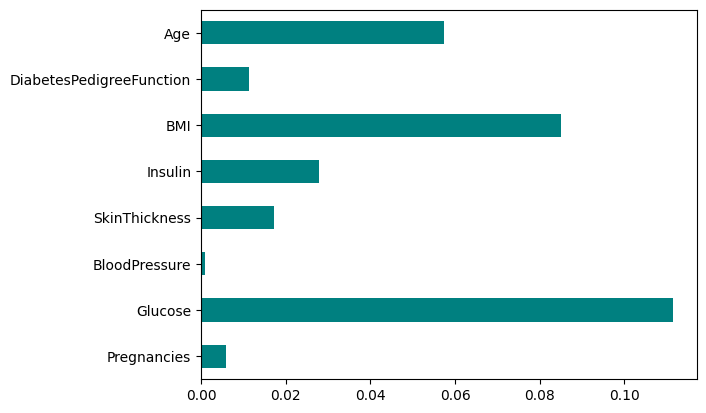

In [65]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = X.astype(int)
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X, Y)
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:',X_kbest_features.shape[1])

Original feature number: 8
Reduced feature number: 3


<Axes: >

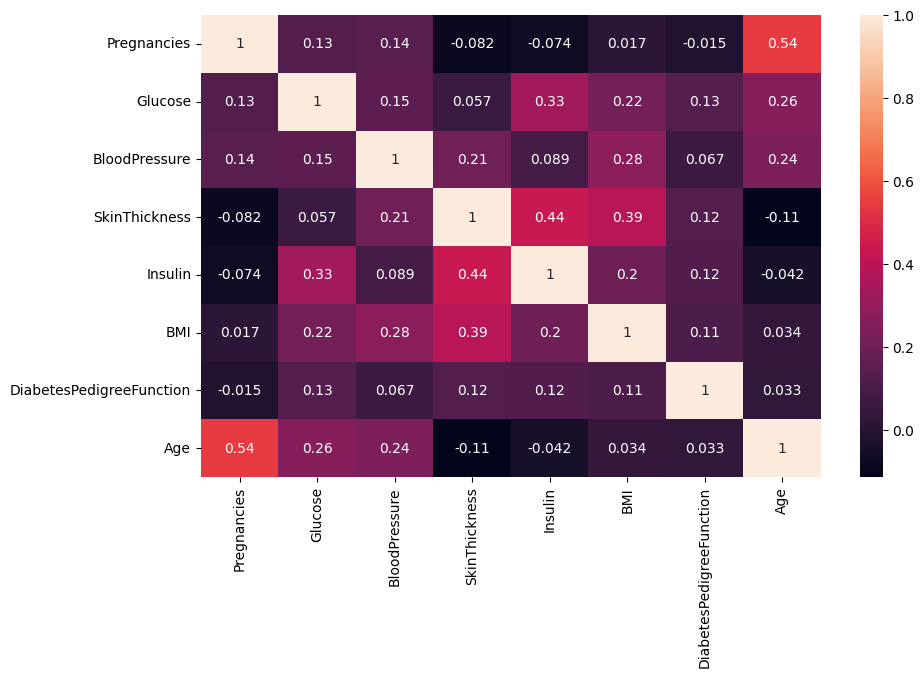

In [67]:
import seaborn as shs
import matplotlib.pyplot as plt
%matplotlib inline
# Correlation
cor = X.corr()
# Plotting Heatmap
plt.figure(figsize = (10,6))
shs.heatmap(cor, annot = True)

In [69]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Forward Feature Selection
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import sklearn.externals as extjoblib
import joblib
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, k_features=3, forward=True, floating=False, verbose=2, scoring='accuracy', cv=0)
sfs1 = sfs1.fit(X, Y)


[2023-10-03 01:23:45] Features: 1/3 -- score: 0.7669270833333334
[2023-10-03 01:23:46] Features: 2/3 -- score: 0.8138020833333334
[2023-10-03 01:23:46] Features: 3/3 -- score: 0.8190104166666666

In [70]:
sfs1.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.76692708]),
  'avg_score': 0.7669270833333334,
  'feature_names': ('Glucose',)},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.81380208]),
  'avg_score': 0.8138020833333334,
  'feature_names': ('Glucose', 'BMI')},
 3: {'feature_idx': (1, 4, 5),
  'cv_scores': array([0.81901042]),
  'avg_score': 0.8190104166666666,
  'feature_names': ('Glucose', 'Insulin', 'BMI')}}

In [72]:
feature_names = ('Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age')

sfs1 = sfs1.fit(X, Y, feature_names)

sfs1.subsets_


[2023-10-03 01:42:43] Features: 1/3 -- score: 0.7669270833333334
[2023-10-03 01:42:43] Features: 2/3 -- score: 0.8138020833333334
[2023-10-03 01:42:44] Features: 3/3 -- score: 0.8190104166666666

{1: {'feature_idx': (1,),
  'cv_scores': array([0.76692708]),
  'avg_score': 0.7669270833333334,
  'feature_names': ('Glucose',)},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.81380208]),
  'avg_score': 0.8138020833333334,
  'feature_names': ('Glucose', 'BMI')},
 3: {'feature_idx': (1, 4, 5),
  'cv_scores': array([0.81901042]),
  'avg_score': 0.8190104166666666,
  'feature_names': ('Glucose', 'Insulin', 'BMI')}}

In [73]:
sfs1.k_feature_idx_

(1, 4, 5)

In [74]:
sfs1.k_feature_names_

('Glucose', 'Insulin', 'BMI')

In [75]:
sfs1.k_score_

0.8190104166666666

By visualizing the feature importance, we gained insights into how each feature contributes to categorizing data points into their respective classes. This analysis revealed that these 3 most important features are Glucose, Insulin, BMI, highlighting their significant role in understanding and classifying patient outcomes.

Hence we can say that Glucose, Insulin, BMI, if observed we can be strong indicators if the patient has diabites or no.  

#References
ChatGPT

Python documentation for Pandas

Matplotlib documentation: Matplotlib

Seaborn documentationL Seaborn

J. Tang, S. Alelyani and H. Liu, "Feature Selection for Classification: A Review" in Data Classification: Algorithms and Applications, CRC Press, 2014.

https://medium.com/towards-artificial-intelligence/why-and-what-is-feature-engineering-in-ml-46a6bf7de5c6